![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# Subir a repositorio de Github, con al menos un pull request, y devolver el link

1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.





In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [3]:
# Datos
# ==============================================================================
 # OPCION 2
from sklearn.datasets import load_diabetes
data = load_diabetes()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[data['target'], data['data']],
                     columns= ['target'] + data['feature_names'] )
data['target'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

In [4]:
datos =  data

# CORRELACION ENTRE COLUMNAS

In [5]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
61,s1,s2,0.896663,0.896663
71,s2,s1,0.896663,0.896663
85,s3,s4,-0.738493,0.738493
95,s4,s3,-0.738493,0.738493
94,s4,s2,0.659817,0.659817
74,s2,s4,0.659817,0.659817
107,s5,s4,0.617857,0.617857
97,s4,s5,0.617857,0.617857
3,target,bmi,0.586450,0.586450
33,bmi,target,0.586450,0.586450


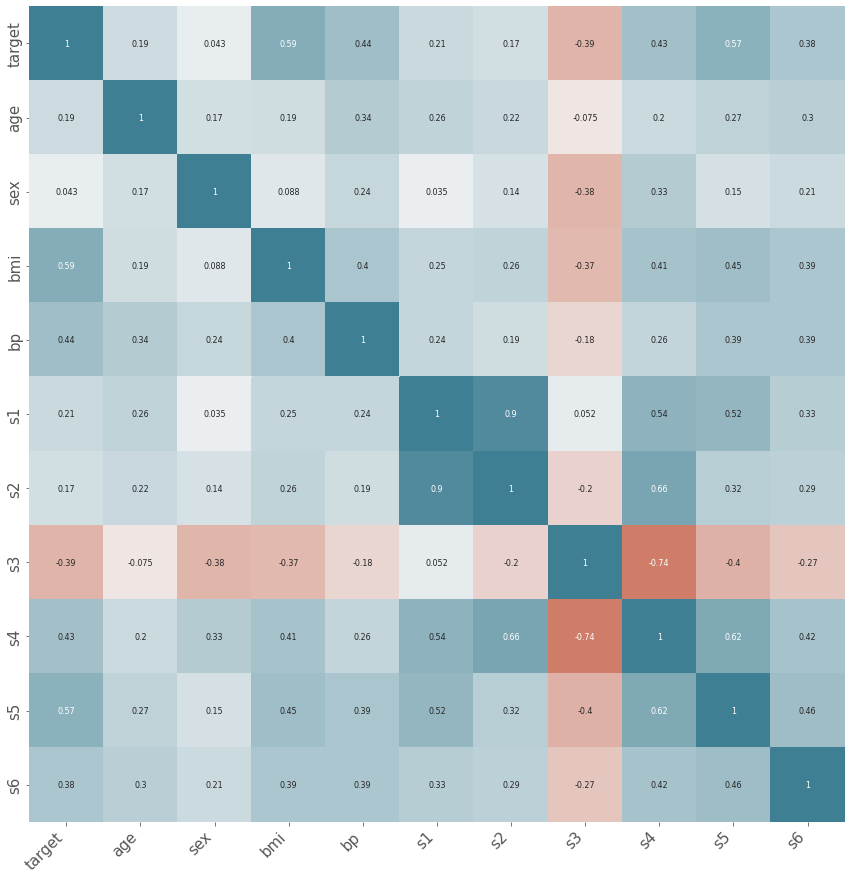

In [6]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 15)

IndexError: ignored

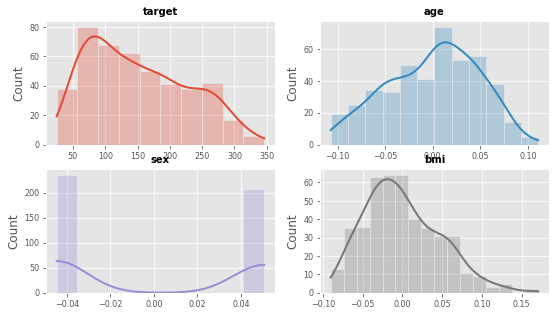

In [7]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

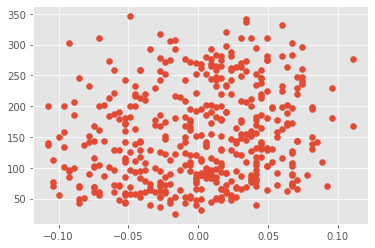

In [8]:
plt.scatter(datos['age'],datos['target'])

# FUNCION DE DIAGNOSTICOS DE RESIDUOS GRAFICOS

In [34]:
# FUNCIION DE DIAGNOSTICOS DE RESIDUOS GRAFICOS
def diagnostic_garbages(y_train, prediccion_train,residuos_train ):
  ''' 
  Se reciben los siguientes parametros
  y_train = vector de salida de entrenamiento
  prediccion_train =  resultado de diagnostico de errores
  residuos_train = resultado de diagnostico de errores
  '''
  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

  axes[0, 0].scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                  'k--', color = 'black', lw=2)
  axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
  axes[0, 0].set_xlabel('Real')
  axes[0, 0].set_ylabel('Predicción')
  axes[0, 0].tick_params(labelsize = 7)

  axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[0, 1].set_xlabel('id')
  axes[0, 1].set_ylabel('Residuo')
  axes[0, 1].tick_params(labelsize = 7)

  sns.histplot(
      data    = residuos_train,
      stat    = "density",
      kde     = True,
      line_kws= {'linewidth': 1},
      color   = "firebrick",
      alpha   = 0.3,
      ax      = axes[1, 0]
  )

  axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                      fontweight = "bold")
  axes[1, 0].set_xlabel("Residuo")
  axes[1, 0].tick_params(labelsize = 7)


  sm.qqplot(
      residuos_train,
      fit   = True,
      line  = 'q',
      ax    = axes[1, 1], 
      color = 'firebrick',
      alpha = 0.4,
      lw    = 2
  )
  axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
  axes[1, 1].tick_params(labelsize = 7)

  axes[2, 0].scatter(prediccion_train, residuos_train,
                    edgecolors=(0, 0, 0), alpha = 0.4)
  axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
  axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
  axes[2, 0].set_xlabel('Predicción')
  axes[2, 0].set_ylabel('Residuo')
  axes[2, 0].tick_params(labelsize = 7)

  # Se eliminan los axes vacíos
  fig.delaxes(axes[2,1])

  fig.tight_layout()
  plt.subplots_adjust(top=0.9)
  fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");


# CONTINUAMOS CON
*   DIVISION DE LOS DATOS EN TRAIN & TEST
*   CREAR MODELO
*   ENTRENAMIENTO
*   INTERVALOS DE CONFIANZA (para los coeficientes del modelo)
*   DIAGNOSTICO DE ERRORES

Entreno 3 modelos mas, donde el set de datos esta modificado
1. Entreno el modelo si realizar cambios 
2. Todas las columnas mas alejadas de 0 se eliminan como predictores.
3. Elimino solo algunas columnas.

Se mostraran los valores de los modelos para poder analizar entre si.

Los residuos **no parecen distribuirse de forma aleatoria en torno a cero**, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón **apunta a una falta** de **homocedasticidad** y de **distribución normal**



                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     29.63
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           9.78e-39
Time:                        19:22:45   Log-Likelihood:                -1602.4
No. Observations:                 296   AIC:                             3227.
Df Residuals:                     285   BIC:                             3267.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.4340      3.223     46.679      0.0

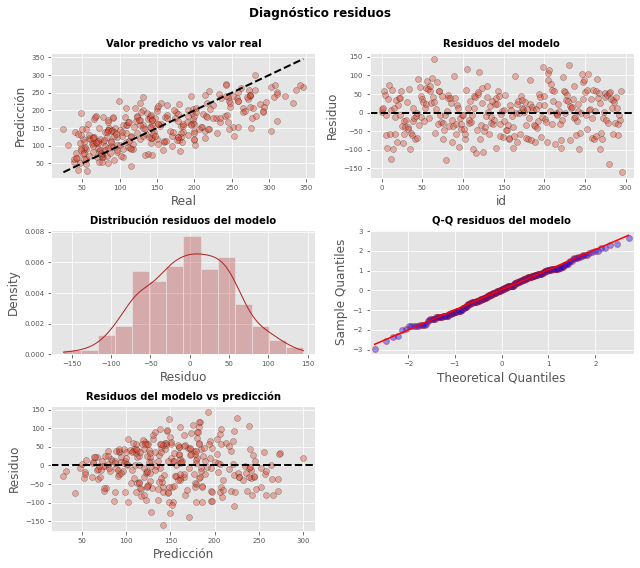

In [46]:
# División de los datos en train y test
# ==============================================================================
#PONER CODIGO AQUI
X = datos.drop(columns = 'target')
y = datos['target']

# DIVISION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
# datos_train = pd.DataFrame(
#                     np.hstack((X_train, y_train)),
#                     columns=[]
#               )
# modelo = smf.ols(formula = 'ventas ~ tv + radio + periodico', data = datos_train)
# modelo = modelo.fit()
# print(modelo.summary())

# Creación del modelo utilizando matrices como en scikitlearn
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo

# CREAR MODELO Y ENTRENAMIENTO
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print(intervalos_ci)

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)


El modelo con todas las variables introducidas como predictores tiene un  R2 de (0.527), es capaz de explicar el 52.7% de la variabilidad observada en las ventas. 

¿¿¿¿¿¿¿El p-value ( Prob (F-statistic)) del modelo es significativo (7.15e-50) por lo que se puede aceptar que el modelo es mejor que lo esperado por azar, al menos uno de los coeficientes parciales de regresión es distinto de 0.??????

Acorde al p-value obtenido para el coeficiente parcial de regresión de age, s1, s2, s3, s4, s6 esta variable no contribuye de forma significativa al modelo. Se entrena de nuevo el modelo, pero esta vez excluyendo dichos predictores.

**REVISAR**
indicadores


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     64.95
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.34e-39
Time:                        19:22:57   Log-Likelihood:                -1613.5
No. Observations:                 296   AIC:                             3237.
Df Residuals:                     291   BIC:                             3255.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.0104      3.307     45.357      0.0

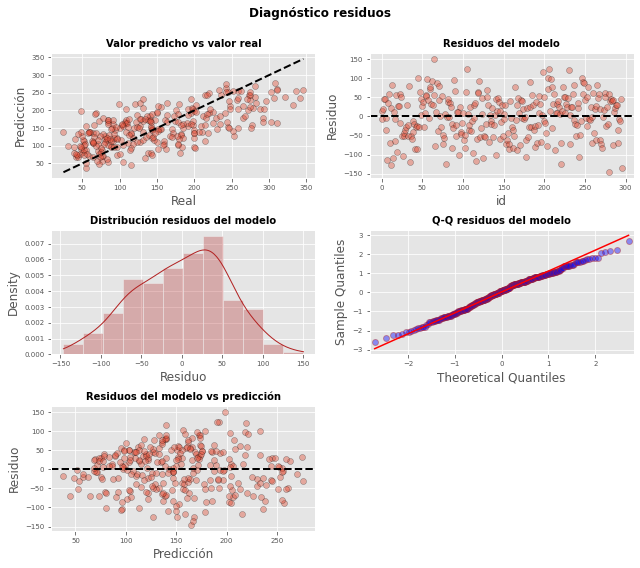

In [47]:
# EVALUANDO QUITANDO LAS COLUMNAS DE MENOR PESO
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train_2 = X_train.drop(columns=['age','s1','s2','s3','s4','s6'])
X_test_2 = X_test.drop(columns=['age','s1','s2','s3','s4','s6'])
X_train_2 = sm.add_constant(X_train_2, prepend=True)
modelo_clear_1 = sm.OLS(endog=y_train, exog=X_train_2,)
modelo_clear_1 = modelo_clear_1.fit()
print(modelo_clear_1.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo_clear_1.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print("\n" + "INTERVALO DE CONFIANZA" +"\n")
print(intervalos_ci)
print("\n" + "######################" +"\n")

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo_clear_1.predict(exog = X_train_2)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)


                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     42.71
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           4.28e-41
Time:                        19:23:08   Log-Likelihood:                -1602.5
No. Observations:                 296   AIC:                             3221.
Df Residuals:                     288   BIC:                             3251.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.4303      3.205     46.931      0.0

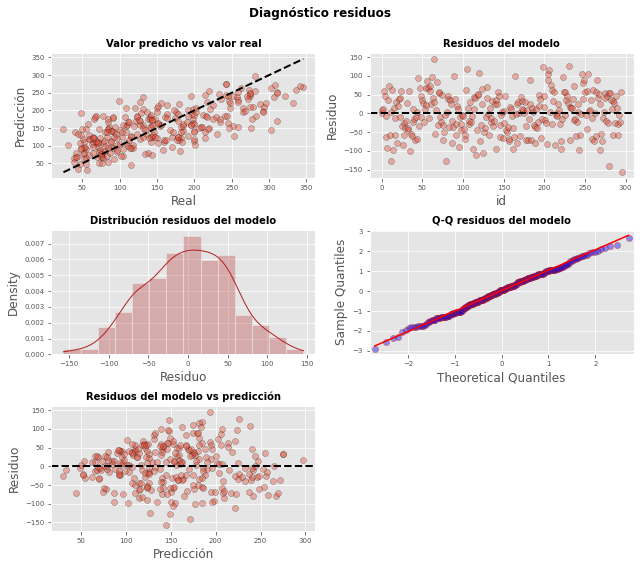

In [48]:
# EVALUANDO QUITANDO LAS COLUMNAS DE MENOR PESO
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train_3 = X_train.drop(columns=['age','s3','s6'])
X_test_3 = X_test.drop(columns=['age','s3','s6'])
X_train_3 = sm.add_constant(X_train_3, prepend=True)
modelo_clear_2 = sm.OLS(endog=y_train, exog=X_train_3,)
modelo_clear_2 = modelo_clear_2.fit()
print(modelo_clear_2.summary())

# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
intervalos_ci = modelo_clear_2.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
print("\n" + "INTERVALO DE CONFIANZA" +"\n")
print(intervalos_ci)
print("\n" + "######################" +"\n")

# Diagnostico de Errores
# ==============================================================================
y_train_flatten = y_train.values.flatten()
prediccion_train = modelo_clear_2.predict(exog = X_train_3)
residuos_train   = prediccion_train - y_train_flatten
diagnostic_garbages(y_train_flatten, prediccion_train,residuos_train)


# Test de normalidad


Se comprueba si los residuos siguen una distribución normal empleando dos test estadísticos: Shapiro-Wilk test y D'Agostino's K-squared test. Este último es el que incluye el summary de statsmodels bajo el nombre de Omnibus.

En ambos test, **la hipótesis nula considera que los datos siguen una distribución normal**, por lo tanto, **si el p-value no es inferior al nivel de referencia alpha seleccionado, no hay evidencias para descartar que los datos se distribuyen de forma normal.**

In [49]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9959864020347595, pvalue=0.6536272168159485)

In [50]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 1.5856763925928279, p-value = 0.4525585208783136


# Predicciones
Una vez entrenado el modelo, se pueden obtener predicciones para nuevos datos. Los modelos de statsmodels permiten calcular los intervalos de confianza asociados a cada predicción.

In [53]:
# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
print(predicciones.head(4))

# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones2 = modelo_clear_1.get_prediction(exog = X_train_2).summary_frame(alpha=0.05)
print(predicciones2.head(4))

# Predicciones con intervalo de confianza 
# ==============================================================================
predicciones3 = modelo_clear_2.get_prediction(exog = X_train_3).summary_frame(alpha=0.05)
print(predicciones3.head(4))

           mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
231  156.054780   6.782908     142.703829     169.405730     46.302020   
325  200.678440  11.433735     178.173161     223.183718     89.440371   
193  128.534379   9.739405     109.364089     147.704669     17.922805   
109  138.532391  11.371978     116.148670     160.916112     27.318852   

     obs_ci_upper  
231    265.807539  
325    311.916508  
193    239.145953  
109    249.745930  
           mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
231  147.281187   6.020045     135.432839     159.129536     34.749323   
325  204.878359  10.671083     183.876072     225.880645     91.018212   
193  134.611785   8.276690     118.322022     150.901549     21.526007   
109  126.676176   5.366029     116.115028     137.237324     14.272551   

     obs_ci_upper  
231    259.813051  
325    318.738505  
193    247.697564  
109    239.079800  
           mean    mean_se  mean_ci_lower  mean_ci_upper  

# Error Test

In [54]:
# Error de test del modelo 
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predicciones = modelo.predict(exog = X_test)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

# Error de test del modelo 2
# ==============================================================================
X_test_2 = sm.add_constant(X_test_2, prepend=True)
predicciones2 = modelo_clear_1.predict(exog = X_test_2)
rmse2 = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones2,
        squared = False
       )
print("")
print(f"El error (rmse2) de test es: {rmse2}")

# Error de test del modelo 3
# ==============================================================================
X_test_3 = sm.add_constant(X_test_3, prepend=True)
predicciones3 = modelo_clear_2.predict(exog = X_test_3)
rmse3 = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones3,
        squared = False
       )
print("")
print(f"El error (rmse3) de test es: {rmse3}")


El error (rmse) de test es: 53.08296873921688

El error (rmse2) de test es: 53.549599478157994

El error (rmse3) de test es: 52.826921376950025


# Interpretación
El modelo de regresión lineal múltiple:

target = 2.9004 + 0.0456tv + 0.1904radio
 
es capaz de explicar el 89.4% de la varianza observada en las ventas (R-squared: 0.894, Adj. R-squared: 0.892). El test  F  es significativo (p-value: 3.69e-77). Por lo que hay evidencias claras de que el modelo es capaz de explicar la varianza en las ventas mejor de lo esperado por azar. Los test estadísticos para cada variable confirman que tv y radio están relacionadas con la cantidad de ventas y contribuyen al modelo.

No se satisfacen las condiciones de normalidad, por lo que los intervalos de confianza estimados para los coeficientes y las predicciones no son fiables.

El error (rmse) de test es de 1.696. Las predicciones del modelo final se alejan en promedio 1.696 unidades del valor real.

# Comparación de modelos mediante test F-test (ANOVA)

Supóngase un modelo  M  y otro modelo  m , de menor tamaño, formado por un subconjunto de los predictores contenidos en  M . Si la diferencia en el ajuste es muy pequeña, acorde al principio de parsimonia, el modelo  m  es más adecuado. Es posible contrastar si la diferencia en ajuste es significativa mediante la comparación de los residuos. En concreto el estadístico empleado es:

# $ \frac {RSS_m - RSS_M}{RSS_M} $
 
Para evitar que el tamaño del modelo influya en el contraste, se divide la suma de residuos cuadrados RSS de cada modelo entre sus grados de libertad. El estadístico resultante sigue una distribución  F .

#  $ \frac{(RSS_m - RSS_M)/(df_m - df_M)}{RSS_M/(df_M)} \sim F_{df_m-df_M, \ df_M} $
 
donde  df  son los grados de libertad del modelo, que equivalen al número de observaciones menos el número de predictores.

En los apartados anteriores, se entrenó un modelo que incluía interacciones y otro que no. Se procede a realizar un test de hipótesis que evalúe la hipótesis nula de que ambos modelos se ajustan a los datos igual de bien. Es decir, que permita determinar si un modelo es mejor que el otro prediciendo la variable respuesta. Esto puede hacerse con la función anova_lm() de statsmodels.stats.anova.


In [55]:
anova_lm(modelo, modelo_clear_1,modelo_clear_2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,285.0,872988.704654,0.0,NaN,NaN,NaN
1,291.0,940776.496871,-6.0,-67787.792218,3.724253,NaN
2,288.0,873682.214052,3.0,67094.282819,7.372304,0.000089


El test ANOVA encuentra evidencias claras (p-value prácticamente de cero) de que el modelo que incluye la interacción entre predictores es capaz de modelar mejor la variable respuesta.

Esta forma de comparar modelos está muy arraigada en la comunidad estadística. En la comunidad de machine learning es mucho más común comparar modelos con técnicas de validación como la validación cruzada.